

**Investing in Construction and Infastructure Companies Including Commercial Aerospace and Defense Industries**

There has been a recurring importance of maintaining infrastructure for not only our highways but also buildings that must be up to code. A multitude of construction and infrustructure companies can see this as an opportunity to cooperate with cities to develop plans in mainting the infrastructure of commercial buildings and roads. In addition, investing in our defence and aerospace sector can help strengthen strategic objectives when necessary. It is also pertinent to specialize and ashieve new benchmarks in both defence and aerospace industries. These industries will be of importance in the long-term.

There has been increasing amounts of people who are retiring from these sectors. It has become incresaingly important for these industries to maintain the highest standard of work. However, not many people find it lucrative in joining these industries. It is essential to recognize the importance of these sectors. It also important that technology to be improved in the long run. That is why it is necessary for funding to take shape for these companies.

**Why focus on aerospace and defence?**

It is essential to focus on these types of industries because these are invaluable assets that help the country. Additionally, we must understand that the importance of these industries are relevant in justifying the investments made to upgrade aging technology.


**Using Cluster Matrices to Study Covariant, Affine Price Behaviors between Construction/Infastruture Companies and Aerospace/Defence**

This study samples the recent price behavior of 10 companies, then traces the covariant, linear behavior, matrix style. Affine, or common mover groups are established, and presented interactively, for the viewer in a visual milieu.

Discussion of data pipeline used, and the subsequent data transformations needed in order to create this affine matrix, as well as the technical tools to facilitate this.

**Overview of Data Science Techniques**

The pipeline includes downloading data, introducing processing efficiencies, model building and cross validation, and cluster expression. I outline my steps as I take them, to arrive at a matrix of pricing which affords the following advantages.

The experiement was adapted from scikit-learn's own documentation, where the techniques were applied to the US stock market. My rendition creates several departures while adapting the advantage of Varoquaux's pipeline.[1]

1. The data ingest is fast, efficient, updateable and portable. Anyone may use this code to build a working model of US-traded stocks, and add symbols they wish to see, where I have missed them.
2. Data represent public, recently settled trades.
3. Local CPU resources are used in order to use notebook memory efficiently, and leverage local Linux resources.
4. Data remains in perpetuity for the analyst, or it may be rebuilt, using updated, daily trade series.
5. Data is built as a time series, in the OHLC format, where Opening, Closing, High and daily Low prices are located.
6. Clustering is aimed toward predictive use, where clusters can achieve whatever size is needed, to cluster affine, covariant items
7. Every company under consideration is measured for covariance against each other and to locate other trades in the same linear way
8. Sparse Inverse Covariance is the technique used to identify relationships between every item in the Matrix, and thus explose clusters of products, trading similarly. This is a list of connected items, trading conditionally upon the others.Thus the list is a useable, probable list of items which trade in the same way, over a week of US business.
9. An edge model exposes the borders for classification, and locates clusters at its discretion. Thus, no supervised limits are imposed in cluster formation.
10. Hyperparameters are determined via search with a predetermined number of folds, where each subset is used to locate model parameters, which are averaged at the close of the run.
11. Given the large volume of colinear features, a cross validation technique is used to 'lasso' model features.

**Building the Data Science Environment for Linux and Python**

Use the following commands to interface with your underlying linux environment. These may not need to be commented out, but will remain necessary each time a new kernel boot, in your notebook, takes place.

In [1]:
!pip install yfinance==0.2.40
!pip install vega_datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.51
    Uninstalling yfinance-0.2.51:
      Successfully uninstalled yfinance-0.2.51


**Data Ingest from Public Markets**

The free, common Yahoo Finace API is used to download data from all commodites you wish to see studied. This data will be stored persistently next to your notebook in common environments such as Binder.

Please note that if you deploy this notebook in Google Collab that the 37+ files downloaded will be erased between uses, but can be rebuilt easily each time you operate this notebook.

The data you download becomes permanently usable, and the ingest request below can be customized in order to grab more, or less data and at different intervals.[2]

I have included several exceptions to the download and renaming technique, in order to tolerate stocks with differing ticker symbols.

In [2]:
import yfinance as yf
from time import time,ctime, clock_gettime
from time import gmtime, time, time_ns

def ifs(input):
    ni = ''
    if input =='gff':
        input = 'GFF'
        ni = "GF=F"
    elif input == 'zff':
        input = 'ZFF'
        ni = "ZF=F"
    else:
        input = input.upper()
        ins = "="
        before = "F"
        ni = input.replace(before, ins + before , 1)
    print(ni)
    data = yf.download(
        tickers = ni,
        period = "6mo",
        interval = "1d",
        group_by = 'ticker',
        auto_adjust = True,
        prepost = True,
        threads = True,
        proxy = None
    )
    epoch = ctime()
    filename = input
    data.to_csv(filename)
#!ls #only in jupy

**Trigger Data Downloads**

The following code customizes the stocks under investigation. In order to compare every commodity's price history versus the rest in your matrix, the lengths of the data captures are minimized to the length of the smallest data set. Thus, larger sets are only captured at the length of the smallest set.

The volatility of every price tick is calculated via [close price minus open price].

In [3]:
#read in csv data from each commodity capture, gather
#assign 'open' to an array, create df from arrays
import numpy as np
import pandas as pd
from  scipy.stats import pearsonr
symbol_dict = {"VLO":"Valero Energy", "XOM":"Exxon Corp", "JPM":"JP Morgan", "TGT":"Target Corp", "INTC":"Intel Corporation", "AMZN":"Amazon.com, Inc.", "RTX":"Raytheon Technologies Corp", "HD":"Home Depot Inc", "LMT":"Lockheed Martin Corp"} #QQ, SPY , TNX, VIX

sym, names = np.array(sorted(symbol_dict.items())).T

for i in sym:    #build all symbol csvs, will populate/appear in your binder. Use linux for efficient dp
  ifs(i)

quotes = []
lens = []
for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    lens.append(t.shape[0])
mm = np.amin(lens)-1
print("min length of data: ",mm)

for symbol in sym:
    symbol = symbol.upper()
    t = pd.read_csv(symbol)
    t= t.truncate(after=mm)
    quotes.append(t)
mi = np.vstack([q["Close"] for q in quotes]) #min
ma = np.vstack([q["Open"] for q in quotes]) #max

volatility = ma - mi


AMZN


[*********************100%%**********************]  1 of 1 completed


HD


[*********************100%%**********************]  1 of 1 completed


INTC


[*********************100%%**********************]  1 of 1 completed


JPM


[*********************100%%**********************]  1 of 1 completed


LMT


[*********************100%%**********************]  1 of 1 completed


RTX


[*********************100%%**********************]  1 of 1 completed


TGT


[*********************100%%**********************]  1 of 1 completed


VLO


[*********************100%%**********************]  1 of 1 completed


XOM


[*********************100%%**********************]  1 of 1 completed

min length of data:  126


**Data Format**

After downloading this massive store of data, you should click on a file, in your project. Using the file browser, you will see a large quantity of new files.

When you open one, you will see the rows of new data.


**Cross Validate for Optimal Parameters: the Lasso**

Varoquaux's pipeline involves steps in the following two cells.

A set of clusters is built using a set of predefined edges, called the edge model. The volatility of every OHLC tick is fed into the edge model, in order to establish a covariance to each other.

The advantages of the Graphical Lasso model is that a cross validated average set of hyperparameters is located, then applied to cluster each stock. Thus, every stock is identified with other stockss which move in tandem, together, over seven days. I print the alpha edges below, and visualize this group.

Depending upon the markets when you run this study, more intensive clustering may take place at either end of the spectrum. This exposes the covariance between different groups, while exposing outlier clusters.

**Using the Interactive Graph**

Feel free to move your mouse into the graph, then roll your mouse. This will drill in/out and allow you to hover over data points. They will mape to the edges of the clusters, under investigation.




In [4]:
from sklearn import covariance
import altair as alt
alphas = np.logspace(-1.5, 1, num=15)
edge_model = covariance.GraphicalLassoCV(alphas=alphas)
X = volatility.copy().T
X /= X.std(axis=0)
l =edge_model.fit(X)
n= []
print(type(l.alphas))
for  i in range(len(l.alphas)):
    print(l.alphas[i])
    dict = {"idx":i , "alpha":l.alphas[i]}
    n.append(dict)

dd = pd.DataFrame(n)
alt.Chart(dd).mark_point(filled=True, size=100).encode(
    y=alt.Y('idx'),
    x=alt.X('alpha'),tooltip=['alpha'],).properties(
        width=800,
        height=400,
        title="Edges Present Within the Graphical Lasso Model"
    ).interactive()

<class 'numpy.ndarray'>
0.03162277660168379
0.047705826961439296
0.07196856730011521
0.10857111194022041
0.16378937069540642
0.2470911227985605
0.372759372031494
0.5623413251903491
0.8483428982440722
1.279802213997954
1.9306977288832505
2.9126326549087382
4.39397056076079
6.628703161826448
10.0


alt.Chart(...)

**Definining cluster Membership, by Covariant Affinity**

Clusters of covariant, affine moving stocks are established. This group is then passed into a dataframe so that the buckets of symbols can become visible.

In [8]:
import pandas as pd
import numpy as np

# Example setup (replace with your data)
clusters = 3
names = np.array(["AMZN", "HD", "INTC", "TGT"])
labels = np.array([0, 0, 1, 2])  # Example labels

# Initialize an empty DataFrame
gdf = pd.DataFrame(columns=["cluster", "symbols", "size", "names"])

# Populate the DataFrame using a loop
for i in range(clusters):
    l = names[labels == i]  # Adjust logic if needed
    ss = np.array(names)[labels == i]
    cluster_dict = {"cluster": (i + 1), "symbols": l, "size": len(l), "names": ss}
    gdf = pd.concat([gdf, pd.DataFrame([cluster_dict])], ignore_index=True)

print(gdf.head(15))


  cluster     symbols size       names
0       1  [AMZN, HD]    2  [AMZN, HD]
1       2      [INTC]    1      [INTC]
2       3       [TGT]    1       [TGT]


**Visualizing cluster and affine securities, by volatility**

The interactive graphic requires the user to hover over each dot, in teh scatter chart. The size of the security cluster pushes it to the top, where the user can study the members, whose prices move in covariant fashion.

I have experimented with laying the text of the securities cluster over the dots, but I find that the above table is most helpful, in identifying markets which move in tandem, and with similar price graphs. Also, as groups expand and contract, overlaying text on the chart below may prevent certain clusters from appearing. I appreciate spacing them out, and not congesting the chart.

The user is free to study where his or her chosen security may sit, in close relation to other globally relevant securities.

In [9]:
for i in gdf['cluster']:
    print("cluster ",i)
    d = gdf[gdf['cluster'].eq(i)]
    for j in d.names:
        print(j, ", ")

cluster  1
['AMZN' 'HD'] , 
cluster  2
['INTC'] , 
cluster  3
['TGT'] , 


In [10]:
import altair as alt
def runCluster():
    c = alt.Chart(gdf).mark_circle(size=60).encode(
        x= alt.X('cluster:N'),
        y= alt.Y('size:Q'),
        color='size:Q',
        tooltip=['names'],
        size=alt.Size('size:Q')
    ).properties(
        width=800,
        height=400,
        title="Top Global Stocks, Clustered by Affine Covariance"
    ).interactive()
    #.configure_title("Top Global Stocks, Clustered by Affine Covariance")

    chart =c
    return chart
runCluster()


alt.Chart(...)

**References**

1. Gael Varoquaux. Visualizing the Stock Market Structure. Scikit-Learn documentation pages, https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html
2. Ran Aroussi. YFinance API documents. https://github.com/ranaroussi/yfinance
3. The Altair Charting Toolkit. https://altair-viz.github.io/index.html

In [11]:
!pip install plotly

In [12]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

df_symbol = pd.read_csv('AMZN')    #no .csv

In [13]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [18]:
df_symbol.head(2)

,Date,Open,High,Low,Close,Volume
0,2024-07-18,189.589996,189.679993,181.449997,183.750000,51043600
1,2024-07-19,181.139999,184.929993,180.110001,183.130005,43081800


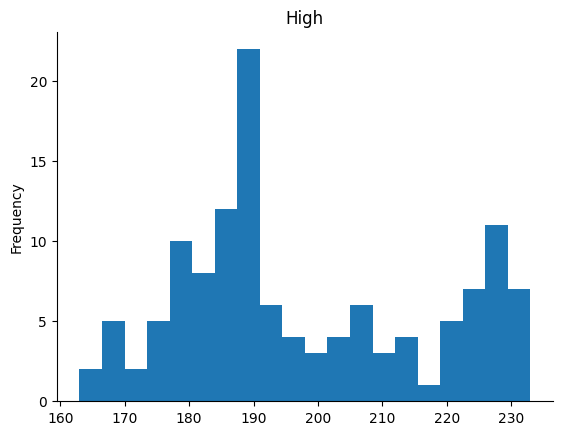

In [16]:
# @title High

from matplotlib import pyplot as plt
df_symbol['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

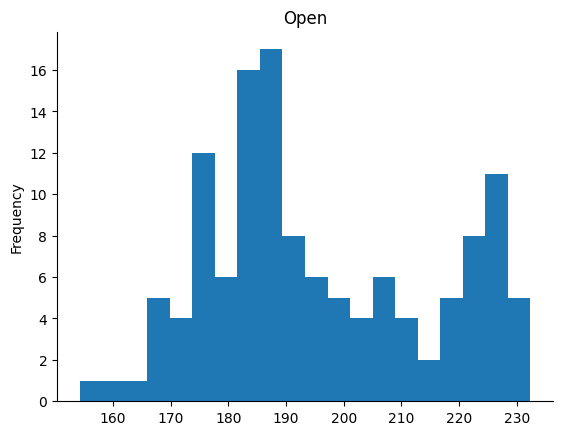

In [15]:
# @title Open

from matplotlib import pyplot as plt
df_symbol['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [19]:
fig = go.Figure(data=[go.Candlestick(x=df_symbol['Date'],
                open=df_symbol['Open'],
                high=df_symbol['High'],
                low=df_symbol['Low'],
                close=df_symbol['Close'])])
fig.show()

In [20]:
# Using plotly.express
import plotly.express as px

df2 = px.data.stocks()
fig = px.line(df2, x='date', y="GOOG")
fig.show()

In [21]:
df2.columns

Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [22]:
df2.head(2)

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988


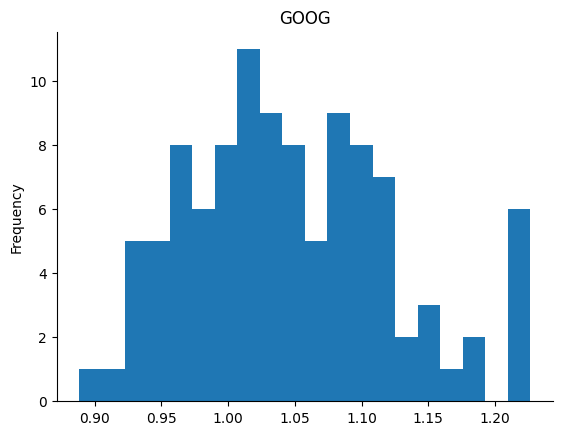

In [23]:
# @title GOOG

from matplotlib import pyplot as plt
df2['GOOG'].plot(kind='hist', bins=20, title='GOOG')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [24]:
df2['GOOG']

,GOOG
0,1.000000
1,1.018172
2,1.032008
3,1.066783
4,1.008773
...,...
100,1.216280
101,1.222821
102,1.224418
103,1.226504


In [25]:
df_symbol.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [26]:
df_symbol['Close']

,Close
0,183.750000
1,183.130005
2,182.550003
3,186.410004
4,180.830002
...,...
122,218.460007
123,217.759995
124,223.350006
125,220.660004


In [27]:
# Using plotly.express
import plotly.express as px
fig = px.line(df_symbol, x='Date', y="Close") #contains GOOG daily price series
fig.show()

#Plotting the Clustered Stocks


In [30]:
#generate a Date column in gdf
def getDateColumn():
  df = pd.read_csv('LMT')  #CHOOSE an equity or vehicle for which you possess a Date index
  return df['Date']  #pandas series

In [31]:
symUpper = [x.upper() for x in sym] #make all symbols in sym to uppercase
# print(symUpper)
gdf = pd.DataFrame(columns=symUpper) #form a new global dataframe, gdf, for purpose of graphing
gdf['Date'] = getDateColumn()            #get a common index for dates, for every commodity or equity
for i in range(len(symUpper)):           #iterate the length of the uppercase symbols
  df_x = pd.read_csv( symUpper[i])       #create one dataframe to hold the csv contents
  gdf[symUpper[i]] = df_x['Close']       #extract the price series from the 'Closed' column
print(gdf.head(3))                       #print the resulting top three rows from the new gdf
# print(gdf.columns)


         AMZN          HD       INTC         JPM         LMT         RTX  \
0  183.750000  361.963806  34.650192  207.628738  470.410065  102.740105   
1  183.130005  359.274353  32.772106  207.430984  469.342773  101.721008   
2  182.550003  359.165619  33.159649  207.925400  469.016632  102.670837   

          TGT         VLO         XOM        Date  
0  149.826324  145.696121  116.890694  2024-07-18  
1  147.501450  146.238373  114.204567  2024-07-19  
2  148.772247  146.918655  113.417419  2024-07-22  


In [ ]:
fig = px.line(gdf, x="Date", y=gdf.columns,
              hover_data={"Date": "|%B %d, %Y"},
              title='Study of Defence, Service, and Infastructure Sectors in the Market')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [32]:
gdf.columns

Index(['AMZN', 'HD', 'INTC', 'JPM', 'LMT', 'RTX', 'TGT', 'VLO', 'XOM', 'Date'], dtype='object')

In [33]:
type(gdf.columns)

pandas.core.indexes.base.Index